In [22]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

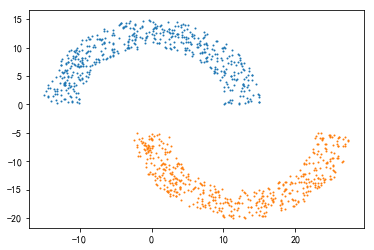

In [23]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [24]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

Problem 3.1 (a) Run the PLA algorithm

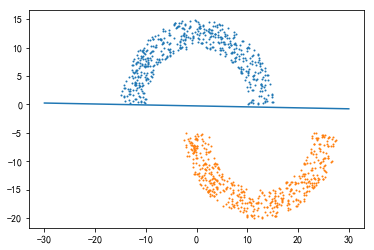

In [25]:
#PLA
def sign(x):
    if x > 0:
        return 1
    else:
        return -1

def Judge(x,w):
    n = x.shape[1] - 1
    flag = 1
    for i in x:
        if sign(i[:n].dot(w))*i[-1] < 0:
            flag = 0
            break
    return flag

def PLA(x,k):
    m,n = x.shape
    n -= 1
    w = np.zeros(n)
    last = 0
    t = 0
    if Judge(x,w):
        pass
    else:
        j = 0
        while Judge(x,w) == 0:
            i = x[j]
            if sign(i[:n].dot(w)) * i[-1] < 0:
                w += k * i[-1] * i[:n]
                t += 1
                last = j
            j += 1
            if(j >= m):
                j = j % m
    return t,last,w
t,last,w = PLA(data,1)

#plot
r = 2 * (rad + thk)
X3 = [-r,r]
Y3 = [-(w[0] + w[1] * i) / w[2] for i in X3]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(X3,Y3)
plt.show()

Problem 3.1 (b) Run the linear regression algorith

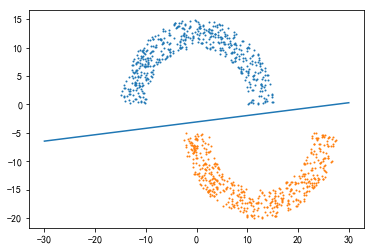

In [26]:
from numpy.linalg import inv

#preprocessing the data
x1 = [[1] + i for i in top]
y1 = [1] * len(top)

x2 = [[1] + i for i in bottom]
y2 = [-1] * len(bottom)

X = np.array(x1 + x2)
Y = np.array(y1 + y2)

w1 = inv(X.T.dot(X)).dot(X.T).dot(Y)

t = 2 * (rad + thk)
X4 = [-t,t]
Y4 = [-(w1[0] + w1[1] * i) / w1[2] for i in X4]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(X4,Y4)
plt.show()

Linear regression can solve the problem too. 

Problem 3.2

In [27]:
import numpy as np
rad=10
thk=5
sep=np.arange(0.2,5.2,0.2)

T=np.array([])

for k in sep:
    top,bottom=generatedata(rad,thk,k,2000,5,10)
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2

    data = np.array(data)
    np.random.shuffle(data)
    
    n = len(data[0])-1
    m = len(data)
    
    t,last,w = PLA(data,1)
    
    T=np.append(T,t)

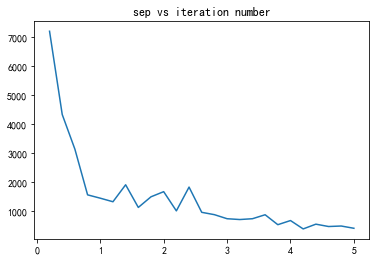

In [29]:
import matplotlib.pyplot as plt

plt.plot(sep,T)
plt.title('sep vs iteration number')
plt.show()

Problem 3.3 (Page 109)

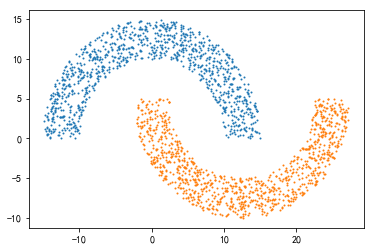

In [30]:
rad = 10
thk = 5
sep = -5

top,bottom = generatedata(rad,thk,sep,2000)


X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

If we run PLA on the data set, the algorithm won't stop because the data set is not linearly separatable. 

In [31]:
#Pocket PLA
def sign(x):
    if x > 0:
        return 1
    else:
        return -1

#count the number of errors
def CountError(x,w):
    n = x.shape[1] - 1
    #the number of errors
    count = 0
    for i in x:
        if sign(i[:n].dot(w)) * i[-1] < 0:
            count += 1
    return count


#PocketPLA,k: step size, max: the maximum number of iterations
def PocketPLA(x,k,maxnum):
    #n: dimension, m: amount of data points
    m,n = x.shape
    n -= 1
    w = np.zeros(n)
    w0 = np.zeros(n)
    error = CountError(x,w)
    Error = []
    if error == 0:
        pass
    else:
        # count the iterations
        j = 0
        while (j < maxnum or error == 0):
            # select the next data point randomly
            k = np.random.randint(0,m)
            i = x[k]
            w = w0 + k * i[-1] * i[:n]
            error1 = CountError(x,w)
            if error > error1:
                w0 = w[:]
                error = error1
            Error.append(error)
            j += 1
    return w0, Error

In [32]:
# pre-processing the data
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

num = 10000

w, error = PocketPLA(data,1,num)

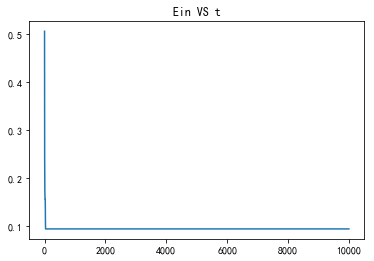

In [12]:
t=np.arange(num)
plt.plot(t,np.array(error)/data.shape[0])
plt.title('Ein VS t')
plt.show()

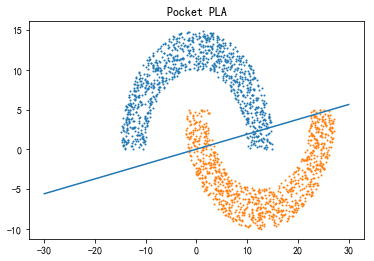

The error rate of Pocket PLA is 0.084


In [34]:
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
t = 2 * (rad + thk)
X3 = [-t,t]
Y3 = [-(w[0] + w[1] * i) / w[2] for i in X3]
plt.plot(X3,Y3)
plt.title('Pocket PLA')
plt.show()
print('The error rate of Pocket PLA is ' + str(CountError(data,w) / data.shape[0]))

(d) linear regression

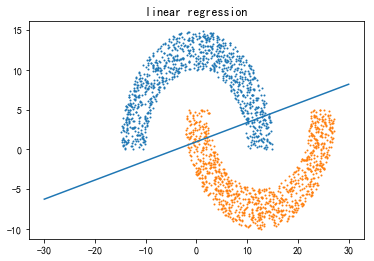

The error rate of linear regression is 0.091


In [36]:
#pre-processing the data
x1 = [[1] + i for i in top]
y1 = [1] * len(top)

x2 = [[1] + i for i in bottom]
y2 = [-1] * len(bottom)

X = np.array(x1 + x2)
Y = np.array(y1 + y2)

w1 = inv(X.T.dot(X)).dot(X.T).dot(Y)

#plot
t = 2 * (rad + thk)
X4 = [-t,t]
Y4 = [-(w1[0] + w1[1] * i) / w1[2] for i in X4]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(X4,Y4)
plt.title('linear regression')
plt.show()
print('The error rate of linear regression is ' + str(CountError(data,w1) / data.shape[0]))

(e) nonlinear transformation

In [37]:

# feature transformation
def transform(data):
    result = []
    for i in data:
        x1 = i[1]
        x2 = i[2]
        flag = i[-1]
        x = [1, x1, x2, x1 * x2, x1**2, x2**2, x1**3, (x1**2)*x2, x1*(x2**2), x2**3, flag]
        result.append(x)
    return np.array(result)

newdata = transform(data)


def f(x,y,w):
    return w[0] + w[1]*x + w[2]*y + w[3]*x*y + w[4]*(x**2) + w[5]*(y**2) + w[6]*(x**3) + w[7]*(x**2)*y + w[8]*x*(y**2) + w[9]*y**3

# number of data points
n = 2000
# x, y
x = np.linspace(-t, t, n)
y = np.linspace(-t, t, n)

# meshgrid
X, Y = np.meshgrid(x, y)

In [38]:
#number of iterations
num = 10000

w, error = PocketPLA(newdata,1,num)

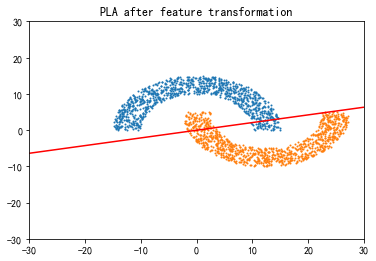

The error rate after feature transformation is 0.084


In [40]:
plt.contour(X, Y, f(X, Y,w), 1, colors = 'red')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.title('PLA after feature transformation')
plt.show()
print('The error rate after feature transformation is ' + str(CountError(newdata,w) / newdata.shape[0]))

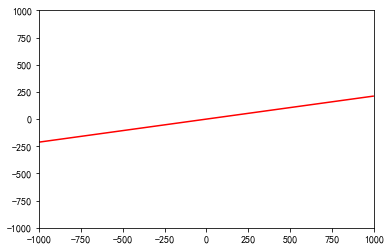

In [42]:
t = 1000
n = 10000
x = np.linspace(-t, t, n)
y = np.linspace(-t, t, n)

X, Y = np.meshgrid(x, y)
plt.contour(X, Y, f(X, Y,w), 1, colors = 'red')
plt.show()

In [47]:
# number of data points
n = 10000
x = np.linspace(-30, 30, n)
y = np.linspace(-30, 30, n)

X, Y = np.meshgrid(x, y)

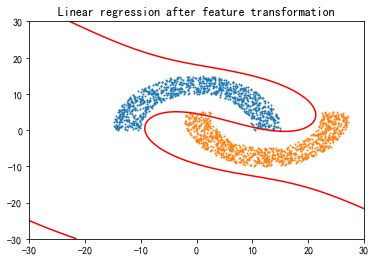

The error rate after feature transformation is 0.007


In [48]:
# pre-processing data
Xnew = newdata[:,:-1]
Ynew = newdata[:,-1]

w1 = inv(Xnew.T.dot(Xnew)).dot(Xnew.T).dot(Ynew)

plt.contour(X, Y, f(X, Y,w1), 1, colors = 'red')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.title('Linear regression after feature transformation')
plt.show()
print('The error rate after feature transformation is ' + str(CountError(newdata,w1) / newdata.shape[0]))